# Nền tảng lý thuyết của tối ưu hóa

## Tối ưu hóa và hàm mất mát

Trong học có giám sát, sai số huấn luyện (hoặc rủi ro thực nghiệm) đo mức độ sai lệch giữa dự đoán của mô hình và nhãn thực tế, được định nghĩa:

$$R_{\textrm{emp}}[\mathbf{X}, \mathbf{y}, f] = \frac{1}{n} \sum_{i=1}^n l(\mathbf{x}^{(i)}, y^{(i)}, f(\mathbf{x}^{(i)}))$$

Trong đó:

- $R_{\textrm{emp}}$: Rủi ro thực nghiệm được tính trên tập huấn luyện
- $l(...)$: Hàm mất mát đo sự khác biệt giữa dự đoán và nhãn thực tế
- $f(\mathbf{x}^{(i)})$: Dự đoán của mô hình cho đầu vào $\mathbf{x}^{(i)}$
- $n$: Số lượng mẫu huấn luyện

Mục tiêu tối ưu hóa là cực tiểu hóa $R_{\textrm{emp}}$ (empirical risk), nhưng mục tiêu cuối cùng là tìm mô hình tổng quát hóa tốt với rủi ro thực (true risk), tránh hiện tượng quá khớp khi khoảng cách giữa hai rủi ro này quá lớn.

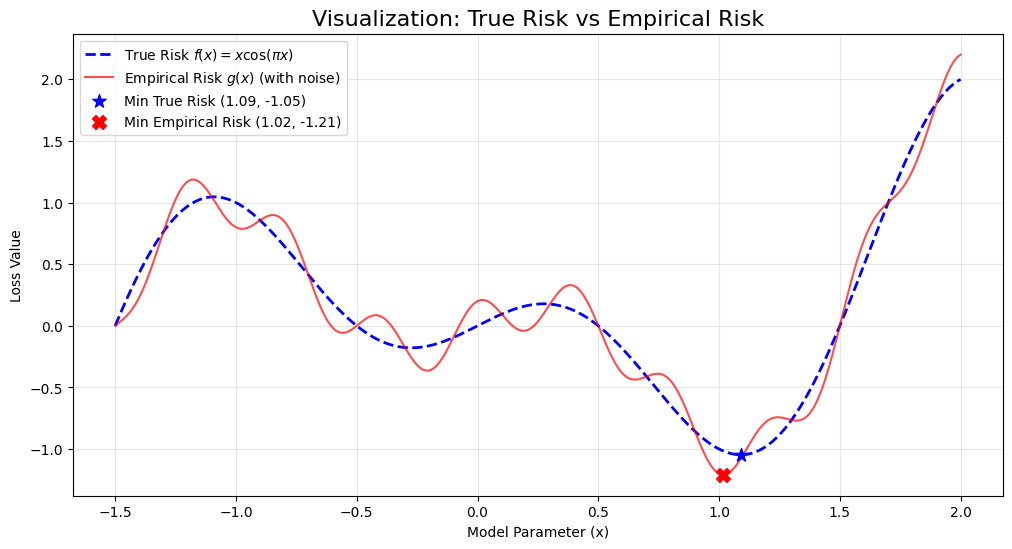

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def true_risk_f(x):
    """
    True Risk function: f(x) = x * cos(pi * x)
    """
    return x * np.cos(np.pi * x)

def empirical_risk_g(x):
    """
    Empirical Risk function: g(x) = f(x) + 0.2 * cos(5 * pi * x)
    """
    # Add noise to f(x)
    noise = 0.2 * np.cos(5 * np.pi * x)
    return true_risk_f(x) + noise

# Create x values range
x = np.linspace(-1.5, 2.0, 1000)

# Calculate y values
y_true = true_risk_f(x)
y_empirical = empirical_risk_g(x)

# Find minima
min_idx_true = np.argmin(y_true)
min_idx_emp = np.argmin(y_empirical)

x_min_true, y_min_true = x[min_idx_true], y_true[min_idx_true]
x_min_emp, y_min_emp = x[min_idx_emp], y_empirical[min_idx_emp]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y_true, label=r'True Risk $f(x) = x \cos(\pi x)$', color='blue', linestyle='--', linewidth=2)
plt.plot(x, y_empirical, label=r'Empirical Risk $g(x)$ (with noise)', color='red', alpha=0.7, linewidth=1.5)

# Mark the minima
plt.scatter(x_min_true, y_min_true, color='blue', s=100, zorder=5, marker='*',
            label=f'Min True Risk ({x_min_true:.2f}, {y_min_true:.2f})')
plt.scatter(x_min_emp, y_min_emp, color='red', s=100, zorder=5, marker='X',
            label=f'Min Empirical Risk ({x_min_emp:.2f}, {y_min_emp:.2f})')

plt.title('Visualization: True Risk vs Empirical Risk', fontsize=16)
plt.xlabel('Model Parameter (x)')
plt.ylabel('Loss Value')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

**Hình ảnh**: So sánh True Risk và Empirical Risk minh họa khoảng cách tổng quát hóa  
_(Note: Original figure reference: `Images/empirical_risk_gen_risk.png`)_

## Gradient

**Định nghĩa:** Gradient của một hàm đa biến là vector chứa các đạo hàm riêng phần cấp một, chỉ hướng tăng nhanh nhất của hàm số.

Đối với hàm mất mát $L(\mathbf{w})$, gradient được xác định:

$$\nabla L(\mathbf{w}) = \left[ \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots, \frac{\partial L}{\partial w_n} \right]^T$$

**Ví dụ:** Với hàm $f(x, y) = x^{2} + y^{2}$, vector gradient là $\nabla f = [2x, 2y]^T$.

Bề mặt paraboloid này có **gradient hướng ra xa tâm**. Trong Gradient Descent, ta di chuyển ngược hướng gradient (xuống dốc) để giảm thiểu hàm mục tiêu. Tại cực tiểu toàn cục $(0,0)$, gradient bằng 0.

_(Note: Original had TikZ 3D plot visualization)_

## Ma trận Hessian

**Định nghĩa:** Ma trận Hessian là ma trận vuông chứa các đạo hàm riêng cấp hai, mô tả độ cong (curvature) của hàm số:

$$H_{ij} = \frac{\partial^{2} f}{\partial x_i \partial x_j}$$

Tại điểm tới hạn (nơi $\nabla f = 0$), Hessian phân loại điểm đó:

- $H$ xác định dương ($\det(H) > 0, H_{11} > 0$): Cực tiểu cục bộ
- $H$ xác định âm ($\det(H) > 0, H_{11} < 0$): Cực đại cục bộ
- $H$ không xác định (có cả giá trị riêng dương và âm): Điểm yên ngựa

### Ví dụ: Kiểm tra điểm $P(1,1)$ của hàm $f(x,y) = x^{3} + y^{3} - 3xy$

**Bước 1 - Đạo hàm bậc nhất:**

$$f_x = 3x^{2} - 3y, \quad f_y = 3y^{2} - 3x$$

**Bước 2 - Ma trận Hessian:**

$$H(x,y) = \begin{bmatrix}
6x & -3 \\
-3 & 6y
\end{bmatrix}$$

**Bước 3 - Tại $P(1,1)$:**

$$H(1,1) = \begin{bmatrix}
6 & -3 \\
-3 & 6
\end{bmatrix}$$

**Bước 4 - Phân loại:**

- $D_1 = 6 > 0$
- $D_2 = \det(H) = 36 - 9 = 27 > 0$

**Kết luận:** Vì $D_1 > 0$ và $D_2 > 0$, ma trận Hessian xác định dương, nên $P(1,1)$ là điểm cực tiểu cục bộ.

## Các thách thức chính trong tối ưu hóa

### Cực tiểu địa phương (Local Minima)

Thuật toán bị mắc kẹt tại điểm có gradient $\nabla L \approx 0$ nhưng chưa đạt cực tiểu toàn cục.

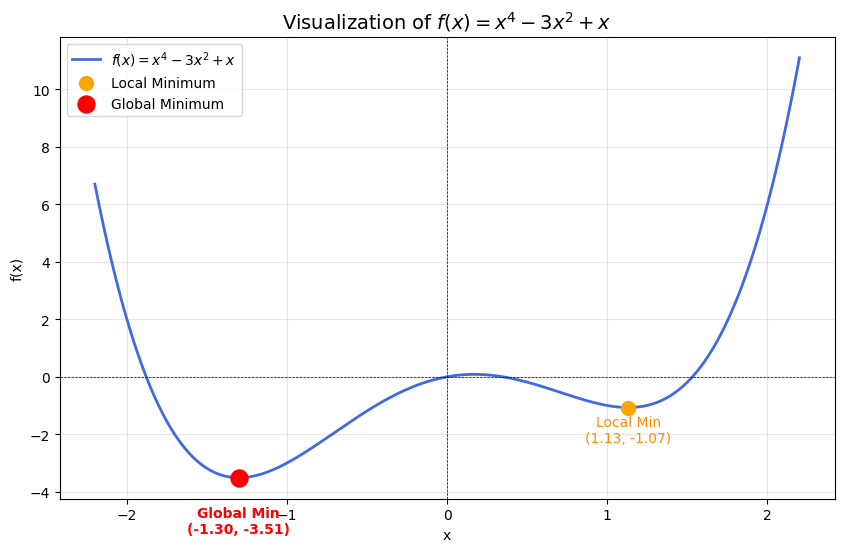

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_function():
    # 1. Định nghĩa hàm số
    def f(x):
        return x**4 - 3*x**2 + x

    # 2. Tìm các điểm cực trị
    # Đạo hàm f'(x) = 4x^3 - 6x + 1
    # Hệ số của đa thức đạo hàm: [4, 0, -6, 1]
    coeffs = [4, 0, -6, 1]
    roots = np.roots(coeffs)  # Tìm nghiệm của đạo hàm

    # Lọc lấy các nghiệm thực
    real_roots = roots[np.isreal(roots)].real

    # Phân loại cực trị (tìm Minimum)
    # Đạo hàm bậc hai f''(x) = 12x^2 - 6
    minima_x = []
    minima_y = []
    for r in real_roots:
        second_derivative = 12 * r**2 - 6
        if second_derivative > 0:  # Điều kiện cực tiểu
            minima_x.append(r)
            minima_y.append(f(r))

    # 3. Xác định Global Minimum
    minima_y = np.array(minima_y)
    minima_x = np.array(minima_x)
    global_min_idx = np.argmin(minima_y)
    global_min_x = minima_x[global_min_idx]
    global_min_y = minima_y[global_min_idx]

    # 4. Vẽ đồ thị
    x = np.linspace(-2.2, 2.2, 500)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='$f(x) = x^4 - 3x^2 + x$', color='royalblue', linewidth=2)

    # Vẽ các điểm Local Minimum (màu cam)
    # Lưu ý: Global Min cũng là một Local Min, nhưng ta sẽ vẽ đè lên bằng màu đỏ
    for mx, my in zip(minima_x, minima_y):
        if mx != global_min_x:
            plt.scatter(mx, my, color='orange', s=100, zorder=5, label='Local Minimum')
            plt.annotate(f'Local Min\n({mx:.2f}, {my:.2f})',
                        (mx, my), textcoords="offset points", xytext=(0,-25),
                        ha='center', color='darkorange')

    # Vẽ điểm Global Minimum (màu đỏ)
    plt.scatter(global_min_x, global_min_y, color='red', s=150, zorder=10, label='Global Minimum')
    plt.annotate(f'Global Min\n({global_min_x:.2f}, {global_min_y:.2f})',
                (global_min_x, global_min_y), textcoords="offset points", xytext=(0,-40),
                ha='center', color='red', fontweight='bold')

    # Trang trí đồ thị
    plt.title('Visualization of $f(x) = x^4 - 3x^2 + x$', fontsize=14)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    visualize_function()

**Hình ảnh**: Hàm $f(x) = x^4 - 3x^2 + x$ minh họa cực tiểu địa phương và toàn cục  
_(Note: Original figure reference: `Images/local-minima.png`)_

### Điểm yên ngựa (Saddle Points)

Tại điểm yên ngựa, gradient bằng 0 nhưng không phải cực trị—bề mặt cong lên theo một hướng và cong xuống theo hướng khác. Gradient rất nhỏ gần điểm này làm thuật toán di chuyển cực chậm.

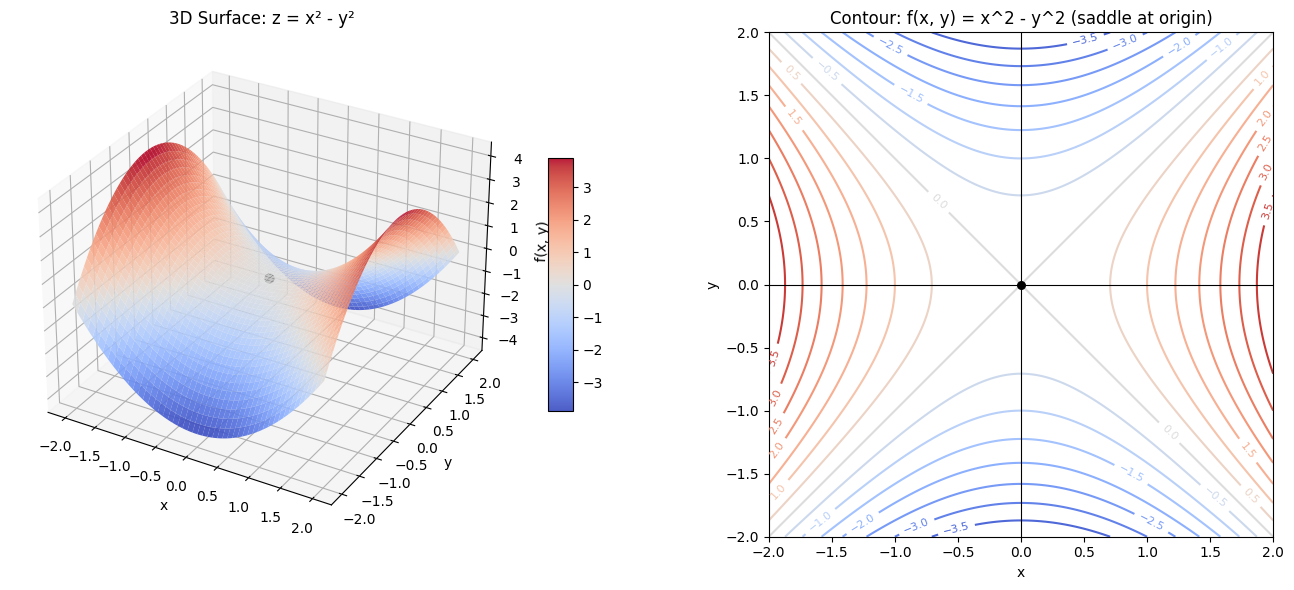

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2

# Create figure with side-by-side subplots
fig = plt.figure(figsize=(14, 6))

# Left subplot: 3D surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=True, alpha=0.9)
ax1.scatter(0, 0, 0, color='k', s=40, label='Saddle point')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface: z = x² - y²')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Right subplot: Contour plot
ax2 = fig.add_subplot(1, 2, 2)
levels = np.linspace(-4, 4, 17)
cs = ax2.contour(X, Y, Z, levels=levels, cmap='coolwarm')
ax2.clabel(cs, inline=True, fontsize=8)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.axvline(0, color='black', linewidth=0.8)
ax2.scatter(0, 0, color='k', s=30, zorder=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour: f(x, y) = x^2 - y^2 (saddle at origin)')
ax2.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


### Ví dụ phân tích: Hàm $f(x, y) = x^2 - y^2$ tại điểm $(0, 0)$

1. **Gradient:** $\nabla f = [2x, -2y]^T$. Tại $(0,0)$: $\nabla f = \mathbf{0}$ (điểm dừng)

2. **Ma trận Hessian:**
   $$H = \begin{bmatrix}
   2 & 0 \\
   0 & -2
   \end{bmatrix}$$

3. **Giá trị riêng:** $\lambda_1 = 2 > 0$, $\lambda_2 = -2 < 0$

**Kết luận:** Ma trận không xác định (có cả giá trị riêng dương và âm) xác nhận $(0,0)$ là điểm yên ngựa.

**Hình ảnh**: Hình yên ngựa của $f(x,y) = x^2 - y^2$ với điểm tới hạn tại gốc tọa độ  
_(Note: Original figure reference: `Images/saddle-point-2.png`)_

### Triệt tiêu Gradient (Vanishing Gradient)

Gradient giảm dần về 0 khi lan truyền ngược qua nhiều lớp sâu, do tích của nhiều đạo hàm nhỏ (ví dụ: Sigmoid có đạo hàm tối đa $0.25$).

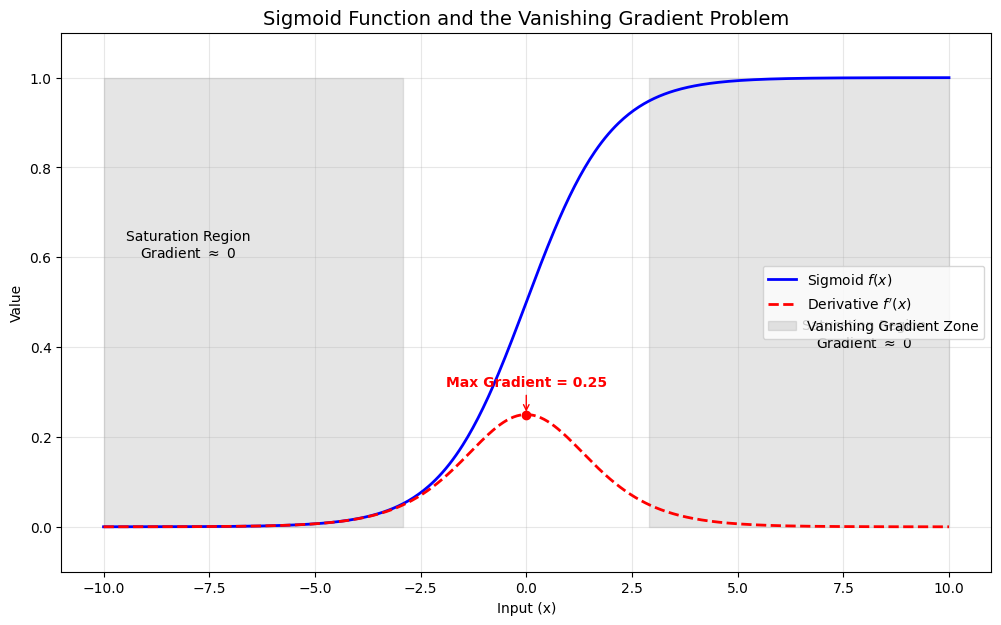

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_sigmoid_vanishing_gradient():
    # 1. Định nghĩa hàm Sigmoid và Đạo hàm
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        s = sigmoid(x)
        return s * (1 - s)

    # 2. Tạo dữ liệu
    # Chọn khoảng rộng (-10, 10) để thấy rõ vùng bão hòa (saturation)
    x = np.linspace(-10, 10, 500)
    y = sigmoid(x)
    dy = sigmoid_derivative(x)

    plt.figure(figsize=(12, 7))

    # 3. Vẽ hàm Sigmoid (Màu xanh)
    plt.plot(x, y, label='Sigmoid $f(x)$', color='blue', linewidth=2)

    # 4. Vẽ Đạo hàm (Màu đỏ - Nét đứt)
    plt.plot(x, dy, label="Derivative $f'(x)$", color='red', linewidth=2, linestyle='--')

    # 5. Tô màu vùng "Triệt tiêu Gradient" (Vanishing Gradient Zones)
    # Giả sử vùng nguy hiểm là khi đạo hàm < 0.05 (tương ứng x < -4 hoặc x > 4)
    mask_vanish = dy < 0.05
    plt.fill_between(x, 0, 1, where=mask_vanish, color='gray', alpha=0.2, label='Vanishing Gradient Zone')

    # 6. Chú thích các điểm quan trọng
    # Max đạo hàm tại x=0
    max_grad = 0.25
    plt.scatter(0, max_grad, color='red', zorder=10)
    plt.annotate(f'Max Gradient = {max_grad}',
                (0, max_grad), xytext=(0, 20), textcoords='offset points',
                ha='center', color='red', fontweight='bold', arrowprops=dict(arrowstyle='->', color='red'))

    # Chú thích vùng bão hòa
    plt.text(-8, 0.6, "Saturation Region\nGradient $\\approx$ 0", ha='center', color='black')
    plt.text(8, 0.4, "Saturation Region\nGradient $\\approx$ 0", ha='center', color='black')

    plt.title('Sigmoid Function and the Vanishing Gradient Problem', fontsize=14)
    plt.xlabel('Input (x)')
    plt.ylabel('Value')
    plt.ylim(-0.1, 1.1)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='center right')
    plt.show()

if __name__ == "__main__":
    visualize_sigmoid_vanishing_gradient()